# NW Missouri State University 44608 Module 7 - Machine Learning

- Author: Aaron Gillespie
- Date: 2025-02-26
- Repo: [On GitHub](https://github.com/aarongilly/datafun-07-ml)
- Purpose:
Completing the 7th and final module of 44608, **Data Analytics Fundamentals**, with this introduction to machine learning with Python and Jupyter Notebooks (specifically *this notebook you're reading now*).

I'll be following along with sections 10.16 and 15.4 from [the textbook](https://www.pearson.com/en-us/subject-catalog/p/intro-to-python-for-computer-science-and-data-science-learning-to-program-with-ai-big-data-and-the-cloud/P200000003444/9780135404676), which cover the usage of simple linear regressions and the use of machine learning for forecasting the future based on existing data. In this case, looking at some historical weather data from New York City.

In [517]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Part 1 - Chart a Straight Line

Following along with section 10.16. We'll use a simple line chart to plot the conversion function between Fahrenheit and Celius using the formula:

```plaintext
c = 5 / 9 * (f - 32)
```

I'm modifying the parameters of the book's example code to start at Fahrenheit -50, rather than 0. This is because I wanted my chart to reflect the fact that **Fahrenheit and Celcius agree at -40 degrees**.

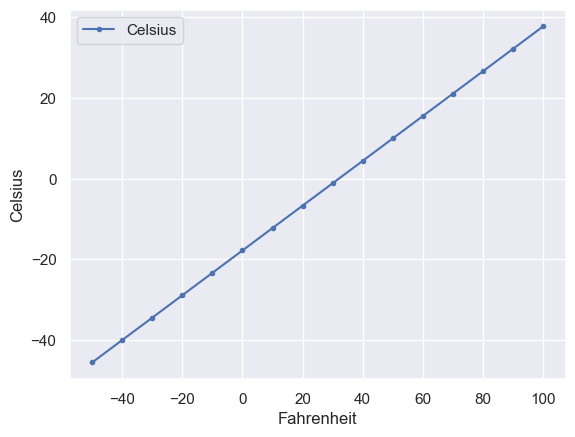

In [518]:
# Creating a lambda function mostly as a demo that lambda functions exist
c = lambda f: 5 / 9 * (f - 32)

# Fillling a list with tuples
temps = [(f, c(f)) for f in range( -50, 101, 10)]

# Creating a DataFrame from the list of tuples
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')

y_label = axes.set_ylabel('Celsius')

## Part 2 - Prediction

Utilizing simple linear regressions. 

### Section 1 - Data Acquisition

In [519]:
# Load the dataset from file
nyc_df = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')


### Section 2 - Data Inspection

Exploring the head & tail of the dataset to get a better feel for what's contained.

#### Head

In [520]:
nyc_df.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


#### Tail

In [521]:
nyc_df.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Section 3 - Data Cleaning

Cleanging the data to prep for Seaborn graphs, below.

In [522]:
# retitling 'value' column
nyc_df.columns = ['Date', 'Temperature', 'Anomaly']

# converting date column to something more readable
nyc_df.Date = nyc_df.Date.floordiv(100)

# Observing the column name change
nyc_df.head()

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9
3,1898,39.6,2.2
4,1899,36.4,-1.0


### Section 4 - Descriptive Statistics

Using the awesome in-built function in Pandas.

In [523]:
# pd.set_option('display.precision', 2) # <- in the book, but didn't seem to have an effect in this case
nyc_df.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### Section 5 - Build the Model

Using SciPy & a basic linear regression.

In [524]:
linear_regression = stats.linregress(nyc_df.Date, nyc_df.Temperature)

#### Slope

In [525]:
linear_regression.slope

np.float64(0.014771361132966163)

In [526]:
#### Intercept

In [527]:
linear_regression.intercept

np.float64(8.694993233674289)

### Section 6 - Predict

Based on data from 1899 to 2018...

In [528]:
forecast = linear_regression.slope * 2024 + linear_regression.intercept

pretty_number = '{:,.1f}'.format(forecast)
print('The forecasted average high temperature for NYC in January 2024 is', pretty_number)

The forecasted average high temperature for NYC in January 2024 is 38.6


### Section 7 - Visualizations

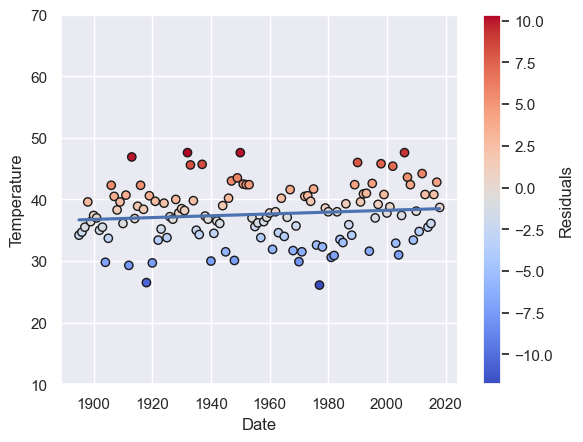

In [529]:
# Code here one-shotted from ChatGPT

sns.set(style='darkgrid')

# Fit the regression model to get the predicted values
sns.regplot(x='Date', y='Temperature', data=nyc_df, ci=None, scatter=False)

# Calculate the predicted values using np.polyfit for the regression line
slope, intercept = np.polyfit(nyc_df['Date'], nyc_df['Temperature'], 1)
predicted_values = slope * nyc_df['Date'] + intercept

# Calculate the residuals (difference between actual and predicted)
residuals = nyc_df['Temperature'] - predicted_values

# Plot the scatter plot and color the points based on residuals
scatter = plt.scatter(nyc_df['Date'], nyc_df['Temperature'], c=residuals, cmap='coolwarm', edgecolor='k')

# Add colorbar to represent residuals
plt.colorbar(scatter, label='Residuals')

# Set plot limits
plt.ylim(10, 70)

# Show plot
plt.show()

## Part 3 - Prediction (also, but this time fancier with machine learning)

### Section 1 - Build the Model

Splitting the dataset into testing and training datasets.

In [530]:
X_train, X_test, y_train, y_test = train_test_split(nyc_df.Date.values.reshape(-1, 1), nyc_df.Temperature.values, random_state=11)

# Determining 75%-25% shape:
X_train_shape = X_train.shape
X_test_shape = X_test.shape

print(f'train: {X_train_shape} and test: {X_test_shape}')

train: (93, 1) and test: (31, 1)


In [531]:
linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

print(f'Coefficient = {linear_regression.coef_} and Intercept = {linear_regression.intercept_}')

Coefficient = [0.01939167] and Intercept = -0.30779820252658396


### Section 2 - Test the Model

In [532]:
predicted_values = linear_regression.predict(X_test)
expected_values = y_test
for p, e, in zip(predicted_values[::5], expected_values[::5]):
    print(f'predicted: {p:.2f} and expected: {e:.2f}')

predicted: 37.86 and expected: 31.70
predicted: 38.69 and expected: 34.80
predicted: 37.00 and expected: 39.40
predicted: 37.25 and expected: 45.70
predicted: 38.05 and expected: 32.30
predicted: 37.64 and expected: 33.80
predicted: 36.94 and expected: 39.70


### Section 3 - Predict

In [533]:
predict = (lambda x: linear_regression.coef_ * x + linear_regression.intercept_)

# List of years to predict
years = [1890, 2019, 2024]

# List to store the predictions
predictions = [predict(year) for year in years]

# Iterate over the list and print the predictions
for year, prediction in zip(years, predictions):
    print(f"{year} Prediction:", prediction)

1890 Prediction: [36.34246432]
2019 Prediction: [38.84399018]
2024 Prediction: [38.94094855]


### Section 4 - Visualizations

Using Seaborn to generate a scatterplot with a best fit line.

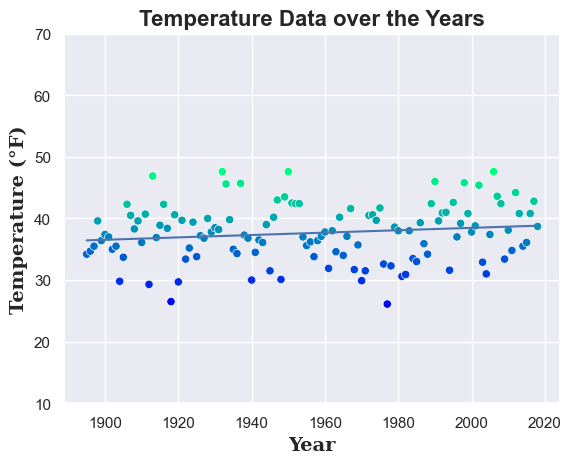

In [534]:
axes = sns.scatterplot(data=nyc_df, x='Date', y='Temperature', hue='Temperature', palette='winter', legend=False)

# Building the x & y values for the line
x = np.array([min(nyc_df.Date.values), max(nyc_df.Date.values)])
y = predict(x)
line = plt.plot(x, y)

# Customize the x-axis label with font size and typeface
axes.set_xlabel('Year', fontsize=14, fontweight='bold', family='serif')

# Customize the y-axis label with font size and typeface
axes.set_ylabel('Temperature (°F)', fontsize=14, fontweight='bold', family='serif')

# Optionally, you can also customize the title, if you want
axes.set_title('Temperature Data over the Years', fontsize=16, fontweight='bold', family='sans-serif')

# Set plot limits
plt.ylim(10, 70)

# Show the plot
plt.show()

## Part 4 - Insights

On its face, this module was about two methods of forecasting values for data you don't have using data you do have - namely **Linear Regressions** and **Machine Learning**. The insights I pulled away from this work do cover this, but the thing that strikes me *most* is just how easy this all has become in the world of Generative AI and VS Code Copilot. 

### Linear Regressions
Linear regressions I'm familiar with from basic statistics and Excel use over the years. Before this class I had never used *Python* or *Jupyter Notebooks* to generate and display a linear regression. I found this toolset quite capable of doing that, obviously... but honestly it wasn't all that much easier than simply using Excel **in this case where the data is simple, tabular, and small**. I recognize that linear regressions utilizing alternative datasets that are larger, more varied in form, and requiring more cleaning would be much, much easier in Python than they are in Excel. 

### Machine Learning
Machine Learning is something I'm notionally familiar with, but **unlike** linear regressions I have not really ever had direct experience building before this classwork. The idea of splitting a dataset into *training* and *testing* data is really neat, conceptually.

#### Comparing Machine Learning and Linear Regressions
This has a much higher ceiling with regard to its predictive value (imagine trying to use a linear regression to classify numbers for Optical Character Recognition), but it also comes with added complexities and new failure modes. For example, the idea of overfitting data has no direct analog in the simpler world of *linear regressions*. Machine learning is capable of taking in much more than 1 dimension, which immediately makes it more powerful. It's also worth noting that the machine learning method took a few more lines of code than the linear regression - **but** the result it produced absolutely could not be as easily replicated using basic Microsoft Excel functions. This is where *coding* for data analysis really outcompetes simple *spreadsheeting*.

### Generative AI & Coding
That's the craziest part of all of this to me - just how *effective* those new developments are at making all of this so much faster and less tedious than it would have been otherwise. The whole thing (generative AI, that is) is mildly frightening. It's like you've been doing derivatives the long way, then someone shows you the power rule trick and you go "oh man, this is so much better I never want to go back", but in this case the utiliz